In [26]:
#reference：https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
import numpy as np
from numpy import linalg 
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

#hack a bit with the t_SNE code in sklearn
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,_kl_divergence)
# from sklearn.utils.extmath import  _ravel 
#Random state
RS=20180929#???用来做什么

#use matplotlib for graph
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib 
% matplotlib inline

#seaborn to make nice plots
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

#to generate an animation
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

Imageio: 'ffmpeg-win32-v3.2.4.exe' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-win32-v3.2.4.exe (34.1 MB)


Downloading: 8192/35749888 bytes (0.040960/35749888 bytes (0.1%90112/35749888 bytes (0.3%155648/35749888 bytes (0.4286720/35749888 bytes (0.8450560/35749888 bytes (1.3589824/35749888 bytes (1.6614400/35749888 bytes (1.7745472/35749888 bytes (2.1778240/35749888 bytes (2.2827392/35749888 bytes (2.3876544/35749888 bytes (2.5942080/35749888 bytes (2.6991232/35749888 bytes (2.81024000/35749888 bytes (2.9%1073152/35749888 bytes (3.0%1089536/35749888 bytes (3.0%1155072/35749888 bytes (3.2%1204224/35749888 bytes (3.4%1253376/35749888 bytes (3.5%1286144/35749888 bytes (3.6%1335296/35749888 bytes (3.7%1368064/35749888 bytes (3.8%1417216/35749888 bytes (4.0%1449984/35749888 bytes (4.1%1466368/35749888 bytes (4.1%1515520/35749888 bytes (4.2%1531904/35749888 bytes (4.3%1548288/35749888 bytes (4.3%1564672/35749888 bytes (4.4%1581056/35749888 bytes (4.4%1597440/35749888 bytes (4.5%1630208/35749888 bytes (4.6%1662976/35749888 bytes (4.7%1695744/35749888 bytes (4.7%1728512/35749888 bytes (4.8%1761280/3

8413184/35749888 bytes (23.58429568/35749888 bytes (23.68445952/35749888 bytes (23.68462336/35749888 bytes (23.78478720/35749888 bytes (23.78495104/35749888 bytes (23.88527872/35749888 bytes (23.98544256/35749888 bytes (23.98577024/35749888 bytes (24.08609792/35749888 bytes (24.18642560/35749888 bytes (24.28675328/35749888 bytes (24.38708096/35749888 bytes (24.48740864/35749888 bytes (24.58790016/35749888 bytes (24.68822784/35749888 bytes (24.78855552/35749888 bytes (24.88888320/35749888 bytes (24.98921088/35749888 bytes (25.08953856/35749888 bytes (25.08986624/35749888 bytes (25.19019392/35749888 bytes (25.29035776/35749888 bytes (25.39068544/35749888 bytes (25.49084928/35749888 bytes (25.49101312/35749888 bytes (25.59134080/35749888 bytes (25.59166848/35749888 bytes (25.69199616/35749888 bytes (25.79216000/35749888 bytes (25.89248768/35749888 bytes (25.99265152/35749888 bytes (25.99281536/35749888 bytes (26.09297920/35749888 bytes (26.09314304/35749888 bytes (26.19330688/35749888 byt

16646144/35749888 bytes (46.6%16678912/35749888 bytes (46.7%16711680/35749888 bytes (46.7%16760832/35749888 bytes (46.9%16793600/35749888 bytes (47.0%16826368/35749888 bytes (47.1%16842752/35749888 bytes (47.1%16891904/35749888 bytes (47.3%16924672/35749888 bytes (47.3%16973824/35749888 bytes (47.5%17006592/35749888 bytes (47.6%17039360/35749888 bytes (47.7%17055744/35749888 bytes (47.7%17072128/35749888 bytes (47.8%17088512/35749888 bytes (47.8%17121280/35749888 bytes (47.9%17154048/35749888 bytes (48.0%17186816/35749888 bytes (48.1%17219584/35749888 bytes (48.2%17268736/35749888 bytes (48.3%17285120/35749888 bytes (48.4%17334272/35749888 bytes (48.5%17350656/35749888 bytes (48.5%17367040/35749888 bytes (48.6%17399808/35749888 bytes (48.7%17432576/35749888 bytes (48.8%17465344/35749888 bytes (48.9%17498112/35749888 bytes (48.9%17530880/35749888 bytes (49.0%17580032/35749888 bytes (49.2%17629184/35749888 bytes (49.3%17661952/35749888 bytes (49.4%17694720/35749888 bytes (49.5%17727488/

23724032/35749888 bytes (66.4%23756800/35749888 bytes (66.5%23789568/35749888 bytes (66.5%23805952/35749888 bytes (66.6%23822336/35749888 bytes (66.6%23838720/35749888 bytes (66.7%23855104/35749888 bytes (66.7%23871488/35749888 bytes (66.8%23887872/35749888 bytes (66.8%23904256/35749888 bytes (66.9%23920640/35749888 bytes (66.9%23953408/35749888 bytes (67.0%23986176/35749888 bytes (67.1%24018944/35749888 bytes (67.2%24035328/35749888 bytes (67.2%24068096/35749888 bytes (67.3%24084480/35749888 bytes (67.4%24100864/35749888 bytes (67.4%24133632/35749888 bytes (67.5%24166400/35749888 bytes (67.6%24182784/35749888 bytes (67.6%24199168/35749888 bytes (67.7%24215552/35749888 bytes (67.7%24231936/35749888 bytes (67.8%24248320/35749888 bytes (67.8%24264704/35749888 bytes (67.9%24281088/35749888 bytes (67.9%24297472/35749888 bytes (68.0%24313856/35749888 bytes (68.0%24330240/35749888 bytes (68.1%24346624/35749888 bytes (68.1%24363008/35749888 bytes (68.1%24395776/35749888 bytes (68.2%24412160/

31326208/35749888 bytes (87.6%31375360/35749888 bytes (87.8%31408128/35749888 bytes (87.9%31440896/35749888 bytes (87.9%31473664/35749888 bytes (88.0%31506432/35749888 bytes (88.1%31539200/35749888 bytes (88.2%31571968/35749888 bytes (88.3%31621120/35749888 bytes (88.5%31670272/35749888 bytes (88.6%31703040/35749888 bytes (88.7%31735808/35749888 bytes (88.8%31768576/35749888 bytes (88.9%31801344/35749888 bytes (89.0%31834112/35749888 bytes (89.0%31850496/35749888 bytes (89.1%31883264/35749888 bytes (89.2%31916032/35749888 bytes (89.3%31940608/35749888 bytes (89.3%31948800/35749888 bytes (89.4%31965184/35749888 bytes (89.4%31997952/35749888 bytes (89.5%32030720/35749888 bytes (89.6%32063488/35749888 bytes (89.7%32096256/35749888 bytes (89.8%32112640/35749888 bytes (89.8%32145408/35749888 bytes (89.9%32178176/35749888 bytes (90.0%32210944/35749888 bytes (90.1%32227328/35749888 bytes (90.1%32243712/35749888 bytes (90.2%32260096/35749888 bytes (90.2%32292864/35749888 bytes (90.3%32309248/

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

ValueError: all the input array dimensions except for the concatenation axis must match exactly

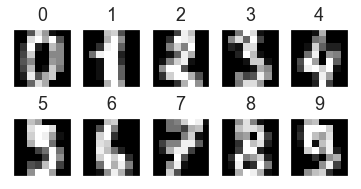

In [29]:
digits=load_digits()
digits.data.shape
print(digits['DESCR'])

nrows,ncols=2,5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols* nrows):
    ax=plt.subplot(nrows,ncols,i+1)
    ax.matshow(digits.images[i,...])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])
# plt.savefig('images/digits-generated.png',dpi=150)
plt.savefig('test.png',dpi=150)

#reorder the data according the handwritten numbers
X=np.vstack([digits.data[digits.target==i] for i in range(10)])
Y=np.hstack([digits.data[digits.target==i] for i in range(10)])
digits_proj =TSNE(random_state=RS).fit_transform(X)

In [ ]:
def scatter(x,colors):
    palette=np.array(sns.color_palette("hls",10))
    
    f=plt.figure(figsize=(8,8))
    ax=plt.subplot(aspect='equal')
    sc=ax.sctter(x[:,0],x[:,1],lw=0,s=40,c=palette[colors.astype(np.int)])
    
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    ax.axis('off')
    ax.axis('tight')
    
    txts=[]
    for i in range(10):
        xtext,ytext=np.median(x[colors==i,:],axis=0)
        txt=ax.text(xtext,ytext,str(i),fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5,foreground='w'),
            PathEffects.Normal()
        ])
        text.append(txt)
    return f,ax,sc,txts
        

In [ ]:
scatter(digits_proj,y)
plt.saevfig('test2/png',dpi=120)

In [34]:
def _joint_probabilities_constant_sigma(D,sigma):
    P=np.exp(-D**2/2 * sigma**2)
    P/=np.sum(P,axis=1)
    return P

In [35]:
#Pairwise distance between all data points
D=pairwise_distances(X,squared=True)

#similarity with consant sigma
P_constant=_joint_probabilities_constant_sigma(D,.002)
#similarity with variable sigma
P_binary=_joint_probabilies(D,30.,False)
#the output of this function needs to be reshaped to a square matrix
P_binary_s=squareform(P_binary)

NameError: name '_joint_probabilies' is not defined

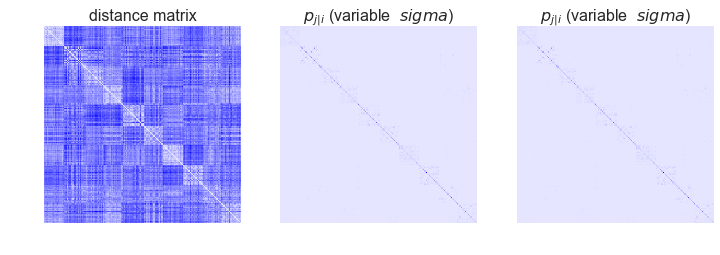

In [41]:
plt.figure(figsize=(12,4))
pal=sns.light_palette("blue",as_cmap=True)

plt.subplot(131)
plt.imshow(D[::10,::10],interpolation='none',cmap=pal)
plt.axis('off')
plt.title("distance matrix",fontdict={'fontsize':16})

plt.subplot(132)
plt.imshow(P_constant[::10,::10],interpolation='none',cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\ sigma$)",fontdict={'fontsize':16})

plt.subplot(133)
plt.imshow(P_constant[::10,::10],interpolation='none',cmap=pal)
plt.axis('off')
plt.title('$p_{j|i}$ (variable $\ sigma$)',fontdict={'fontsize':16})
plt.savefig('test3.png',dpi=120)

In [42]:
position=[]
def _gradient_descent(objective,p0,it,n_iter,n_iter_without_progress=30,
                      momentum=0.5, learining_rate=1000.0,min_gain=0.01,
                      min_grad_norm=1e-7,min_error_diff=1e-7,verbose=0,
                      args=[]):
    p=p0.copy().ravel()
    updata=np.zeros_like(p)
    gains=np.ones_like(p)
    error=np.finfo(np.float).max
    best_error=np.finfo(np.float).max
    best_iter=0
    
    for i in range(it,n_iter):
        positions.append(p.copy())
        new_error,grad=objective(p,*args)
        error_diff=np.abs(new_error-error)
        error=new_error
        grad_norm=linalg.norm(grad)
        
        if error<best_error:
            best_error=error
            best_iter=i
        elif i-best_iter>iter_without_progress:
            break
        if min_grad_norm>=grad_norm:
            break
        if min_error_diff >=error_diff:
            break
        inc=update* grad>=0.0
        dec=np.invert(inc)
        gains[inc]+=0.05
        gains[dec]*=0.05
        np.clip(gains,min_gain,np.inf)
        grad*=gains
        update=momentum* update-learning_rate* grad
        p+=update
    return p,error,i
sklearn.manifold.t_sne.gradient_descent=_gadient_descent

NameError: name '_gadient_descent' is not defined